#### Read In Cleaned Text:

In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd

X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
y_train = pd.read_csv('y_train.csv')

#### Prepare data:
Train the tokenizer and use that tokenizer to convert the sentences to sequences of numbers.



In [2]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text'])

Pad the sequences so each sequence is the same length.

In [4]:
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

#### Build RNN Model:

Import the tools needed and use to calculate precision and recall.

In [5]:
import keras.backend as K 
from keras.layers import Dense, Embedding, LSTM

import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0,1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

Construct the RNN model framework.

In [6]:
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          266240    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 275,649
Trainable params: 275,649
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [7]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

Fit the model

In [8]:
history = model.fit(X_train_seq_padded, y_train['label'],
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 13s 58ms/step - loss: 0.2561 - accuracy: 0.9204 - precision_m: 0.5124 - recall_m: 0.4186 - val_loss: 0.1001 - val_accuracy: 0.9704 - val_precision_m: 0.9714 - val_recall_m: 0.7765
Epoch 2/10
140/140 [==============================] - 6s 44ms/step - loss: 0.0377 - accuracy: 0.9906 - precision_m: 0.9703 - recall_m: 0.9468 - val_loss: 0.0569 - val_accuracy: 0.9874 - val_precision_m: 0.9905 - val_recall_m: 0.9225
Epoch 3/10
140/140 [==============================] - 6s 44ms/step - loss: 0.0100 - accuracy: 0.9975 - precision_m: 0.9902 - recall_m: 0.9775 - val_loss: 0.0763 - val_accuracy: 0.9865 - val_precision_m: 1.0000 - val_recall_m: 0.9097
Epoch 4/10
140/140 [==============================] - 6s 41ms/step - loss: 0.0036 - accuracy: 0.9996 - precision_m: 1.0000 - recall_m: 0.9952 - val_loss: 0.0739 - val_accuracy: 0.9892 - val_precision_m: 1.0000 - val_recall_m: 0.9261
Epoch 5/10
140/140 [==============================] - 6s 41ms/step 

Plot the evaluation metrics by each epoch fot the model to see if we are over or underfitting.

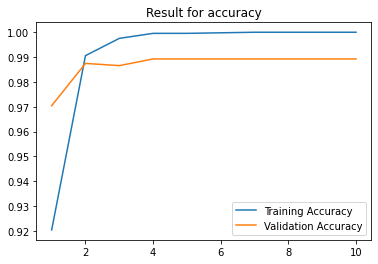

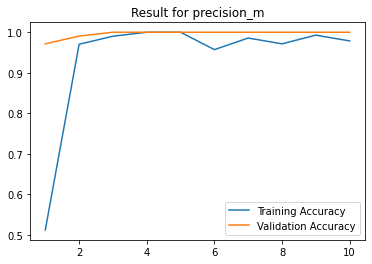

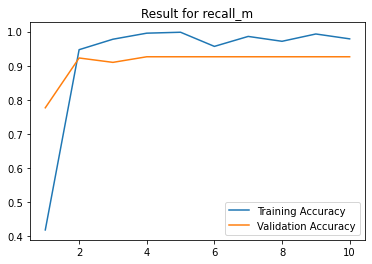

In [9]:
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
  acc = history.history[i]
  val_acc = history.history['val_{}'.format(i)]
  epochs = range(1, len(acc) + 1)

  plt.figure()
  plt.plot(epochs, acc, label='Training Accuracy')
  plt.plot(epochs, val_acc, label='Validation Accuracy')
  plt.title('Result for {}'.format(i))
  plt.legend()
  plt.show()